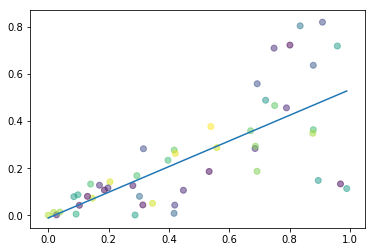

In [131]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
n=50
x=np.random.rand(n)
y=x*np.random.rand(n)
colors=np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

#### Aim of linear regression

build a linear regresson model with pytorch

2.1 example 

aim of it is linear regression is to minimize the distance between the points and the line y=alphax+beta

coefficient:alpha=2 

bias:beta=1

equation:y=2x+1

2.2 building a toy dataset

In [132]:
x_values=[i for i in range(11)]

In [133]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [134]:
#convert to numpy
x_train=np.array(x_values,dtype=np.float32)
x_train.shape

(11,)

In [135]:
#important 2d required 
x_train=x_train.reshape(-1,1) 
x_train.shape

(11, 1)

y=2x+1

In [136]:
y_values=[2*i+1 for i in x_values]

In [137]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [138]:
y_train=np.array(y_values,dtype=np.float32)
y_train.shape

(11,)

In [139]:
#important 2d required 
y_train=y_train.reshape(-1,1) 
y_train.shape

(11, 1)

#### building the model

In [140]:
import torch
#for linear regression model
import torch.nn as nn
from torch.autograd import Variable

1. linear model
    true equation y=2x+1
2. Foward
    input x=1
    output y=?
  

In [141]:
#create class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        #inherit all stuffs from nn.module
        super(LinearRegressionModel,self).__init__()
                                #x    and  y
        self.linear=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        # to get y value for every call
        out=self.linear(x)
        return out
    


# Instantiate model class

input: [0,1,2,....,10]
    
desired_output:[1,3,5,7,9...21]

In [142]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


Inititate Loss class

MSE LOSS: Mean square error
         i=n   
MSE=1/n Segma (yi^-yi)
         i=1  
y^ is perdiction 
y  is true value

In [143]:
criterion=nn.MSELoss()

# instantiate Optimizer class

simplified equation:
parameter=parameter-learningrate*ParamterGradiant

In case of parameters:
parameters : alpha and beta in y=alpha x + beta
    


In [144]:
learningrate=0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learningrate)

In [145]:
epochs=100

In [146]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))
    

epoch 1, loss 276.6166687011719
epoch 2, loss 22.60902214050293
epoch 3, loss 1.889904260635376
epoch 4, loss 0.19940060377120972
epoch 5, loss 0.061006441712379456
epoch 6, loss 0.04921845346689224
epoch 7, loss 0.047762978821992874
epoch 8, loss 0.047155629843473434
epoch 9, loss 0.04662306606769562
epoch 10, loss 0.04610194265842438
epoch 11, loss 0.04558704420924187
epoch 12, loss 0.045078013092279434
epoch 13, loss 0.044574566185474396
epoch 14, loss 0.044076889753341675
epoch 15, loss 0.043584708124399185
epoch 16, loss 0.04309797286987305
epoch 17, loss 0.04261670261621475
epoch 18, loss 0.042140811681747437
epoch 19, loss 0.04167022928595543
epoch 20, loss 0.04120489954948425
epoch 21, loss 0.0407448373734951
epoch 22, loss 0.040289733558893204
epoch 23, loss 0.03983980417251587
epoch 24, loss 0.03939495608210564
epoch 25, loss 0.03895498067140579
epoch 26, loss 0.038519978523254395
epoch 27, loss 0.03808991238474846
epoch 28, loss 0.03766456991434097
epoch 29, loss 0.037244044

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [147]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.75903416],
       [ 2.7937355 ],
       [ 4.828437  ],
       [ 6.863138  ],
       [ 8.89784   ],
       [10.932541  ],
       [12.967242  ],
       [15.001944  ],
       [17.036644  ],
       [19.071346  ],
       [21.106049  ]], dtype=float32)

In [148]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

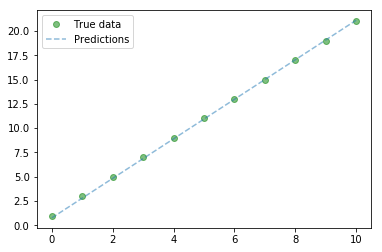

In [154]:
#clear figure
plt.clf()

#Get predictions 
predicted=model(Variable(torch.from_numpy(x_train))).data.numpy()

#plot true data 
plt.plot(x_train,y_train,'go',label='True data',alpha=0.5)

#plot predictions
plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)
#legend and plot
plt.legend(loc='best')
plt.show()